# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

## Imports

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [205]:
from scipy.stats import norm, chi2, gaussian_kde

In [206]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [207]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [208]:
df.head()

,region,date,consumption
0,Auvergne-Rhône-Alpes,2013-01-01,7560
1,Auvergne-Rhône-Alpes,2013-01-02,8700
2,Auvergne-Rhône-Alpes,2013-01-03,9367
3,Auvergne-Rhône-Alpes,2013-01-04,9133
4,Auvergne-Rhône-Alpes,2013-01-05,8283


In [209]:
regions = list(df.region.unique())

In [210]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [211]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [212]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int64

In [213]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

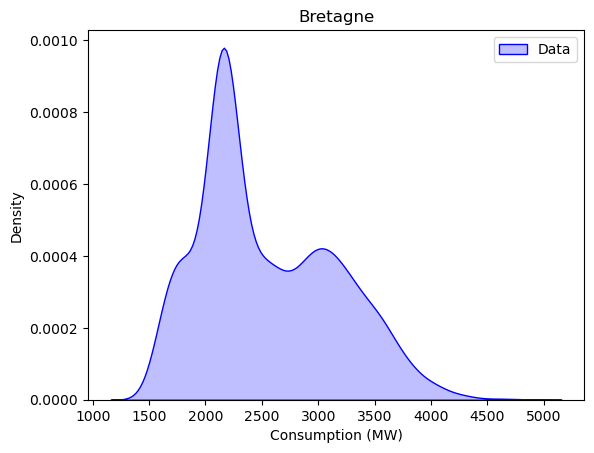

In [98]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Votre réponse :

1. Estimation de la moyenne (\( \mu \))
$$E((\hat \mu ) = E(\frac 1 n \sum_{i=1}^n x_i)) = \frac 1 n E(\sum_{i=1}^n x_i)$$

puisque les xi sont iid de meme loi alors : $$ E(\hat \mu ) = \frac 1 n \sum_{i=1}^n E(x_i) = \frac 1 n n \mu = \mu $$

Pour montrer que les estimateurs pour la moyenne et la variance sont sans biais, nous devons démontrer que l'espérance mathématique des estimateurs est égale à la vraie valeur du paramètre que nous cherchons à estimer.

L'estimateur de la moyenne est donc sans biais.


2. Estimation de la variance ( $\sigma^2 $)) :

L'estimateur de la variance est donné par :

$ \hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat{\mu})^2 $

L'espérance de l'estimateur de la variance est :

$E(\hat{\sigma}^2) = E\left(\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat{\mu})^2\right) = \frac{1}{n-1} E\left(\sum_{i=1}^{n} (x_i - \hat{\mu})^2\right) $

Comme précédemment, en utilisant le fait que les $x_i$ sont i.i.d.

$$ E(\hat{\sigma}^2) = \sigma^2 $$

L'estimateur de la variance est sans biais.


Pour démontrer que l'estimateur de la variance est non biaisé, nous allons utiliser l'espérance mathématique. L'estimateur de la variance est défini comme suit :

$$\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat{\mu})^2$$

Où : $n$ est la taille de l'échantillon, $x_i$ est la valeur de l'échantillon à la i-ème observation. et $\hat{\mu}$ est l'estimateur de la moyenne.

L'espérance mathématique est :

$$E(\hat{\sigma}^2) = E\left(\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat{\mu})^2\right)$$

En utilisant la linéarité de l'espérance, nous pouvons distribuer l'opérateur d'espérance dans la somme :

$$E(\hat{\sigma}^2) = \frac{1}{n-1} E\left(\sum_{i=1}^{n} (x_i - \hat{\mu})^2\right)$$

Maintenant, considérons la partie $E\left(\sum_{i=1}^{n} (x_i - \hat{\mu})^2\right)$. Comme les $x_i$ sont indépendants et identiquement distribués (i.i.d.), nous pouvons écrire cette somme comme $n$ termes identiques :

$$E\left(\sum_{i=1}^{n} (x_i - \hat{\mu})^2\right) = nE((x_1 - \hat{\mu})^2)$$

L'estimateur de la variance est basé sur l'estimateur de la moyenne $\hat{\mu}$. Cependant, comme il s'agit d'un estimateur non biaisé de la moyenne, nous avons :

$$E(\hat{\mu}) = \mu$$

En utilisant cette propriété, nous pouvons simplifier davantage :

$$nE((x_1 - \hat{\mu})^2) = nE((x_1 - \mu + \mu - \hat{\mu})^2)$$

En développant le carré et utilisant les propriétés de l'espérance mathématique, nous obtenons :

$$nE((x_1 - \mu + \mu - \hat{\mu})^2) = nE((x_1 - \mu)^2 + 2(x_1 - \mu)(\mu - \hat{\mu}) + (\mu - \hat{\mu})^2)$$

Ensuite, nous distribuons l'espérance mathématique sur chaque terme :

$$nE((x_1 - \mu)^2) + 2nE(x_1 - \mu)(\mu - \hat{\mu}) + nE(\mu - \hat{\mu})^2$$

Maintenant, nous utilisons la propriété $E(x_1) = \mu$ et $E(\mu - \hat{\mu}) = 0$, car l'estimateur de la moyenne est sans biais. Cela simplifie l'expression :

$$nE((x_1 - \mu)^2) + 0 + nE(\mu - \hat{\mu})^2$$

$$nE((x_1 - \mu)^2) + nE(\mu - \hat{\mu})^2$$

$$nE((x_1 - \mu)^2) + nE(-\hat{\mu})^2$$

$$nE((x_1 - \mu)^2) + n\hat{\mu}^2$$

Maintenant, nous pouvons réintroduire cette expression dans notre calcul initial de l'espérance de l'estimateur de la variance :

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (nE((x_1 - \mu)^2) + n\hat{\mu}^2)$$

En simplifiant, nous avons :

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (nE((x_1 - \mu)^2) + n\hat{\mu}^2)$$

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (nE((x_1 - \mu)^2) + nE(\hat{\mu}^2))$$

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (n(E((x_1 - \mu)^2) + E(\hat{\mu}^2)))$$

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (n(\sigma^2 + \text{Var}(\hat{\mu})))$$

Nous savons que $\text{Var}(\hat{\mu})$ est la variance de l'estimateur de la moyenne, qui est donnée par $\frac{\sigma^2}{n}$ lorsque les échantillons sont i.i.d. En utilisant cette information, nous avons :

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (n(\sigma^2 + \frac{\sigma^2}{n}))$$

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (n(\frac{n+1}{n}\sigma^2))$$

$$E(\hat{\sigma}^2) = \frac{1}{n-1} (n+1)\sigma^2$$

$$E(\hat{\sigma}^2) = \sigma^2 \frac{n+1}{n-1}$$

En fin de compte, nous pouvons voir que $ E(\hat{\sigma}^2) = \sigma^2 \frac{n+1}{n-1} $. Cela prouve que l'estimateur de la variance est non biaisé, car son espérance est égale à la variance $\sigma^2$.

2. Donnez les valeurs obtenues pour la moyen et pour la variance en utilisant ces estimateurs.

In [330]:
#nombre d'observations
n = len(df)
sum_consumption = np.sum(consumption)

#selection de la consumption
consumption = df['consumption']

#Calcul de la moyenne avec l'estimateur 
moyen = np.average(consumption)

#calcul de la variance avec l'estimateur
variance = np.var(consumption,ddof=1)

print("le nombre d'obervations est : ", n, " la moyenne est : ", moyen, " et la variance est : ", variance )

le nombre d'obervations est :  45636  la moyenne est :  4465.19445174862  et la variance est :  4413890.663798295


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [331]:
# Génération de nouvelles données à partir d'une distribution gaussienne
nouvelles_donnees = np.random.normal(moyen, np.sqrt(variance), n)

# Création d'un nouveau DataFrame avec les nouvelles données
nouveau_df = df.copy()
nouveau_df['nouvelle_consommation'] = nouvelles_donnees

# Affichage des premières lignes du nouveau DataFrame
print(nouveau_df.head())

                 region       date  consumption  nouvelle_consommation
0  Auvergne-Rhône-Alpes 2013-01-01         7560            4937.793689
1  Auvergne-Rhône-Alpes 2013-01-02         8700            3775.458073
2  Auvergne-Rhône-Alpes 2013-01-03         9367            2173.014745
3  Auvergne-Rhône-Alpes 2013-01-04         9133            4198.679632
4  Auvergne-Rhône-Alpes 2013-01-05         8283           12452.201789


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

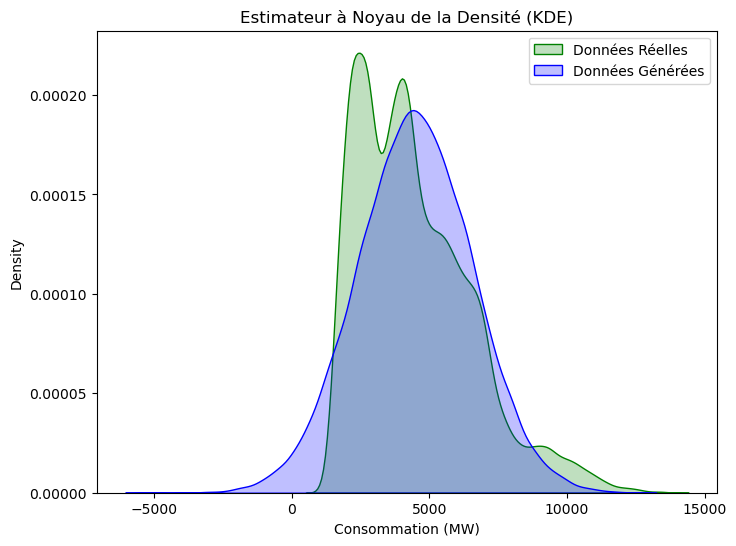

In [233]:
# Tracé de l'estimateur à noyau de la densité (KDE)
plt.figure(figsize=(8, 6))

sns.kdeplot(data=df, x="consumption", label="Données Réelles", color='green', fill=True)
sns.kdeplot(data=nouveau_df, x="nouvelle_consommation", label="Données Générées", color='blue', fill=True)

plt.title("Estimateur à Noyau de la Densité (KDE)")
plt.xlabel("Consommation (MW)")
plt.legend()
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

le nombre d'obervations est :  15624  la moyenne est :  5407.576292882744  et la variance est :  5480938.009925038


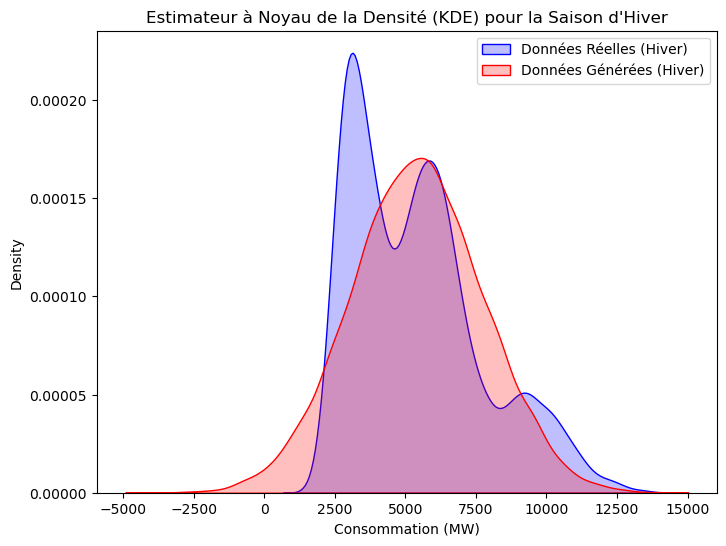

In [218]:
# le modèle avec les données d'hiver (du 22/12 au 21/03)
df['date'] = pd.to_datetime(df['date'])
df_winter = df[(df['date'].dt.month >= 12) | (df['date'].dt.month <= 3)]

# Nombre d'observations pour la saison d'hiver
n_winter = len(df_winter)

#Consommation pour la saison d'hiver
consumption_winter = df_winter['consumption']

# Estimeurs de la moyenne et de la variance pour la saison #Calcul de la moyenne avec l'estimateur 
moyen_winter = np.average(consumption_winter)
variance_winter = np.var(consumption_winter, ddof =1 )

print("le nombre d'obervations est : ", n_winter, " la moyenne est : ", moyen_winter, " et la variance est : ", variance_winter)

# Génération de nouvelles données à partir d'une distribution gaussienne pour la saison d'hiver
nouvelles_donnees_winter = np.random.normal(moyen_winter, np.sqrt(variance_winter), n_winter)

# Création d'un nouveau DataFrame avec les nouvelles données pour la saison d'hiver
nouveau_df_winter = df_winter.copy()
nouveau_df_winter['nouvelle_consommation'] = nouvelles_donnees_winter

# Tracé de l'estimateur à noyau de la densité (KDE) pour la saison d'hiver
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df_winter, x="consumption", label="Données Réelles (Hiver)", color='blue', fill=True)
sns.kdeplot(data=nouveau_df_winter, x="nouvelle_consommation", label="Données Générées (Hiver)", color='red', fill=True)

plt.title("Estimateur à Noyau de la Densité (KDE) pour la Saison d'Hiver")
plt.xlabel("Consommation (MW)")
plt.legend()
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Votre réponse :

L'intégrale de la valeur absolue est toujours possible ou nulle
donc $ d(f, g) = \frac 1 2  * \int{\lvert  f(x) - g(x)\rvert} >= 0 $

Pour montrer que $ (d(f, g) \le 1) $, remarquons que $(|f(x) - g(x)| \le 1)$ pour tout $x$, ce qui signifie que c'est une intégrale d'une quantité bornée par 1. Par conséquent, $(d(f, g))$ est également bornée par 1. 

$d(f, g) = 0$ si et seulement si $f = g$ presque partout pour la mesure de Lebesgue

La dissimilarité $d(f, g) = 0$ si et seulement si  $\int|f(x) - g(x)| = 0 $. Cela signifie que $|f(x) - g(x)| = 0$ pour presque tout $x$. Ainsi $f(x) = g(x)$ presque partout (pour presque tout $x$).

$d(f, g) = 1$ si et seulement si $f\$ et $g$ possèdent des supports disjoints

La dissimilarité $d(f, g) = 1 $ si et seulement si $\int|f(x) - g(x)| = 1 $. Cela signifie que la quantité $|f(x) - g(x)| \ne 0$ pour au moins un $x$, et donc que les supports de $f$ et $g$ ne sont pas identiques. Ainsi $f$ et $g$ possèdent des supports disjoints si $d(f, g) = 1$. 

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [341]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region]

# Extraction des données de consommation
consumption_bretagne = df_region['consumption'].values
n_bretagne = len(consumption_bretagne)
moyen_bretagne = np.mean(consumption_bretagne)
ecart_type_bretagne = np.std(consumption_bretagne)

# KDE des données réelles
kde_real = gaussian_kde(consumption_bretagne)

# Génération de nouvelles données à partir d'une distribution gaussienne pour la saison d'hiver
nouvelles_donnees_bretagne = np.random.normal(moyen_bretagne, ecart_type_bretagne, n_bretagne)

# Création d'un nouveau DataFrame avec les nouvelles données pour la saison d'hiver
nouveau_df_bretagne = df_region.copy()
nouveau_df_bretagne['nouvelle_consommation'] = nouvelles_donnees_bretagne

consumption_bretagne_generée = nouveau_df_bretagne['nouvelle_consommation'].values

# Grille de valeurs pour évaluer le KDE et la densité gaussienne
x = np.linspace(min(consumption_bretagne), max(consumption_bretagne), len(consumption_bretagne))

# Évaluation du KDE des données generées
kde_generees = gaussian_kde(consumption_bretagne_generée)

kde_values_bretagne_reels = kde_real(x)
kde_values_bretagne_generées = kde_generees(x)


dis = 0.5 * np.trapz(np.abs(kde_values_bretagne_reels - kde_values_bretagne_generées), x)
print(dis)



0.15432983291743557


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [352]:
# selection of a region
region = "Bretagne"
df_bretagne_winter = df_winter[df_winter.region == region]

# Extraction des données de consommation
consumption_bretagne_winter = df_bretagne_winter['consumption'].values
n_bretagne_winter = len(consumption_bretagne_winter)
moyen_bretagne_winter = np.mean(consumption_bretagne_winter)
ecart_type_bretagne_winter = np.std(consumption_bretagne_winter)

# KDE des données réelles
kde_real_winter = gaussian_kde(consumption_bretagne_winter)

# Génération de nouvelles données à partir d'une distribution gaussienne pour la saison d'hiver
nouvelles_donnees_bretagne_winter = np.random.normal(moyen_bretagne_winter, ecart_type_bretagne_winter, n_bretagne_winter)

# Création d'un nouveau DataFrame avec les nouvelles données pour la saison d'hiver
nouveau_df_bretagne_winter = df_bretagne_winter.copy()
nouveau_df_bretagne_winter['nouvelle_consommation'] = nouvelles_donnees_bretagne_winter

consumption_bretagne_generée_winter = nouveau_df_bretagne_winter['nouvelle_consommation'].values

# Grille de valeurs pour évaluer le KDE et la densité gaussienne
x = np.linspace(min(consumption_bretagne_winter), max(consumption_bretagne_winter), len(consumption_bretagne_winter))

# Évaluation du KDE des données generées
kde_generees_winter = gaussian_kde(consumption_bretagne_generée_winter)

kde_values_bretagne_reels_winter = kde_real_winter(x)
kde_values_bretagne_generées_winter = kde_generees_winter(x)


dis = 0.5 * np.trapz(np.abs(kde_values_bretagne_reels_winter - kde_values_bretagne_generées_winter), x)
print(dis)


0.032176927875281765


4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [365]:
# Création un DataFrame vide pour stocker les résultats
results = []

for region in regions:
    # Sélection les données de la saison d'hiver pour la région
    df_region_winter = df[(df.region == region) & ((df['date'].dt.month >= 12) | (df['date'].dt.month <= 3))]

    # Extraction des données de consommation
    consumption_region_winter = df_region_winter['consumption'].values
    n_region_winter = len(consumption_region_winter)
    moyen_region_winter = np.mean(consumption_region_winter)
    ecart_type_region_winter = np.std(consumption_region_winter)

    # KDE des données réelles
    kde_real_region_winter = gaussian_kde(consumption_region_winter)

    # Génération de nouvelles données à partir d'une distribution gaussienne pour la saison d'hiver
    nouvelles_donnees_region_winter = np.random.normal(moyen_region_winter, ecart_type_region_winter, n_region_winter)

    # Création d'un nouveau DataFrame avec les nouvelles données pour la saison d'hiver
    nouveau_df_region_winter = df_region_winter.copy()
    nouveau_df_region_winter['nouvelle_consommation'] = nouvelles_donnees_region_winter

    consumption_region_winter_generée = nouveau_df_region_winter['nouvelle_consommation'].values

    # Grille de valeurs pour évaluer le KDE et la densité gaussienne
    x = np.linspace(min(consumption_region_winter), max(consumption_region_winter), len(consumption_region_winter))

    # Évaluation du KDE des données generées
    kde_generees_region_winter = gaussian_kde(consumption_region_winter_generée)

    kde_values_region_winter_reels = kde_real_region_winter(x)
    kde_values_region_winter_generées = kde_generees_region_winter(x)


    dis = 0.5 * np.trapz(np.abs(kde_values_region_winter_reels - kde_values_region_winter_generées), x)

    # Ajout des résultats à la liste
    results.append({'Region': region, 'Dissimilarity': dis})

# Création un DataFrame à partir de la liste de résultats
results_df = pd.DataFrame(results)

# Ale DataFrame final
print(results_df)

                        Region  Dissimilarity
0         Auvergne-Rhône-Alpes       0.034099
1      Bourgogne-Franche-Comté       0.041197
2                     Bretagne       0.032613
3          Centre-Val de Loire       0.028938
4                    Grand Est       0.062623
5              Hauts-de-France       0.025655
6                    Normandie       0.033160
7           Nouvelle-Aquitaine       0.025982
8                    Occitanie       0.051451
9             Pays de la Loire       0.030396
10  Provence-Alpes-Côte d'Azur       0.044563
11               Île-de-France       0.025685


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [366]:
# Tri lu DataFrame par ordre croissant de dissimilarité
best_fit_region = results_df.sort_values(by='Dissimilarity').iloc[0]

print("La région avec le meilleur ajustement au modèle gaussien en hiver est :", best_fit_region['Region'])

La région avec le meilleur ajustement au modèle gaussien en hiver est : Hauts-de-France


6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

Hauts-de-France


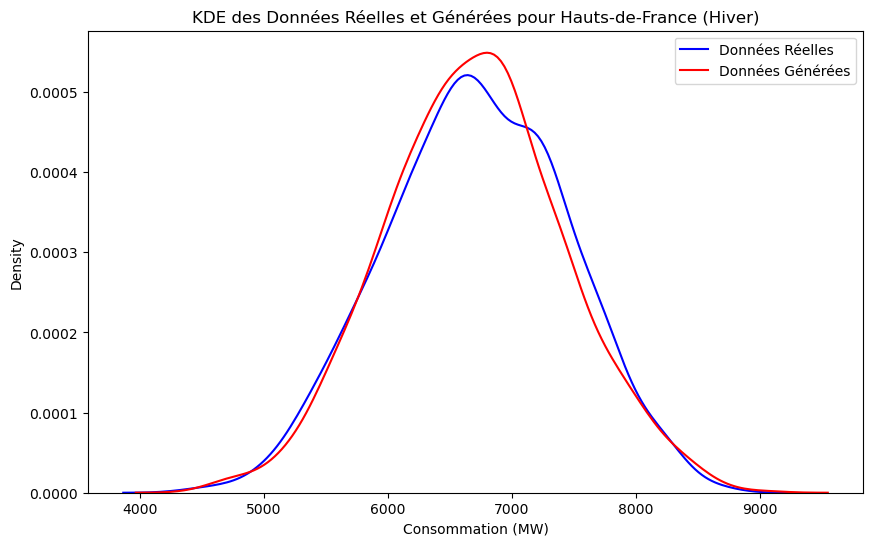

In [367]:
best_fit_region = best_fit_region['Region']
print(best_fit_region)

# Sélection les données de la saison d'hiver pour la région choisie
df_region_winter = df[(df.region == best_fit_region) & ((df['date'].dt.month >= 12) | (df['date'].dt.month <= 3))]

# E la moyenne et la variance pour la saison d'hiver
moyen_winter = np.mean(df_region_winter['consumption'].values)
variance_winter = np.var(df_region_winter['consumption'].values, ddof=1)

# les données aléatoires à partir d'une distribution gaussienne
np.random.seed(0)  # Pour la reproductibilité
random_data = np.random.normal(loc=moyen_winter, scale=np.sqrt(variance_winter), size=len(df_region_winter))

# Création un graphique pour le KDE des données réelles et générées
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_region_winter, x="consumption", label="Données Réelles", color='blue')
sns.kdeplot(data=random_data, label="Données Générées", color='red')
plt.title(f"KDE des Données Réelles et Générées pour {best_fit_region} (Hiver)")
plt.xlabel("Consommation (MW)")
plt.legend()
plt.show()

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$MW et l'écart-type $\sigma_0=500$MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Votre réponse :

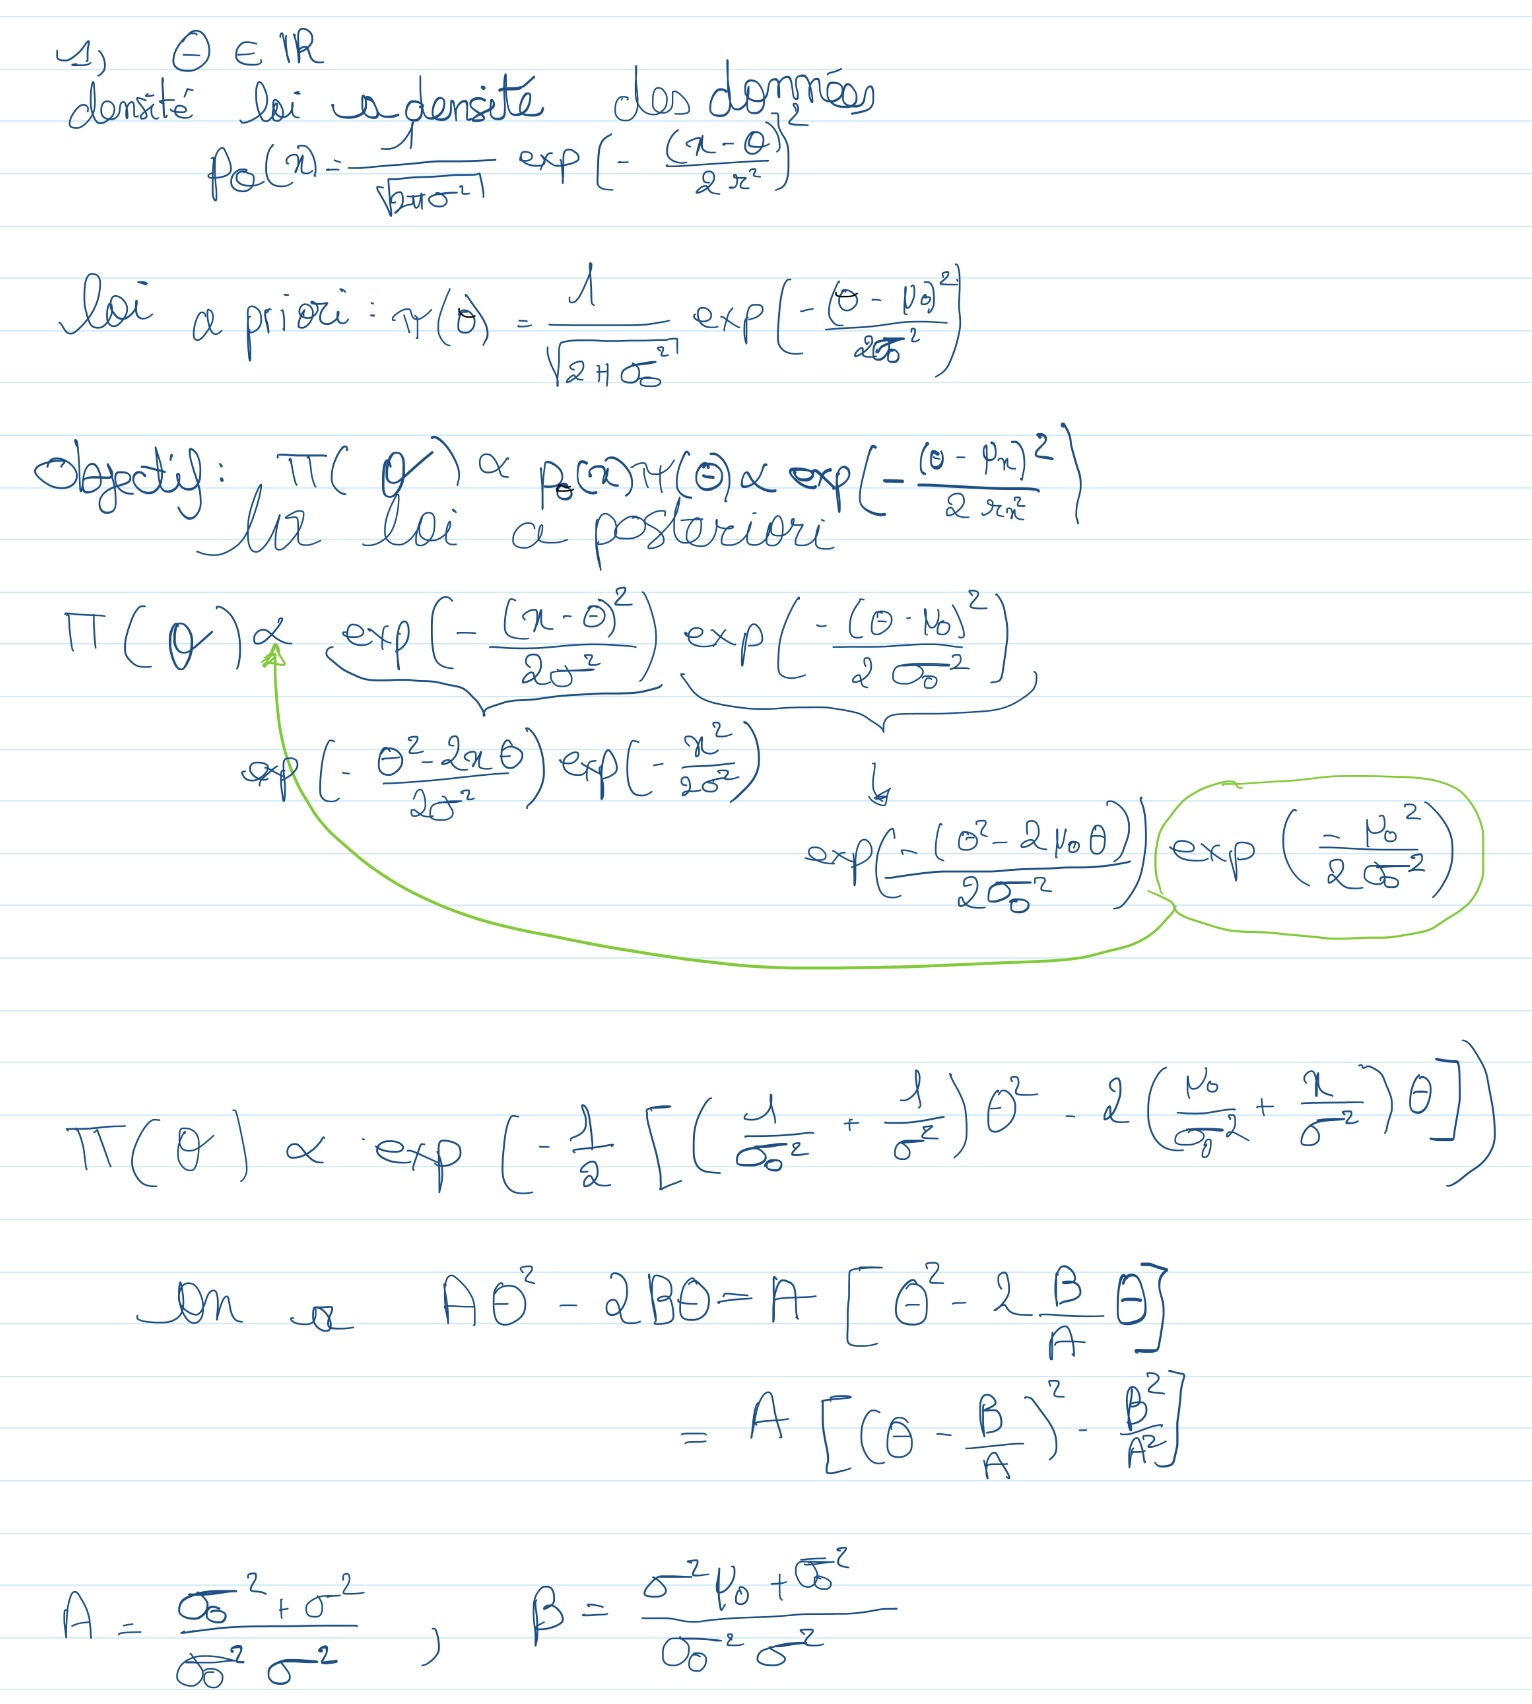


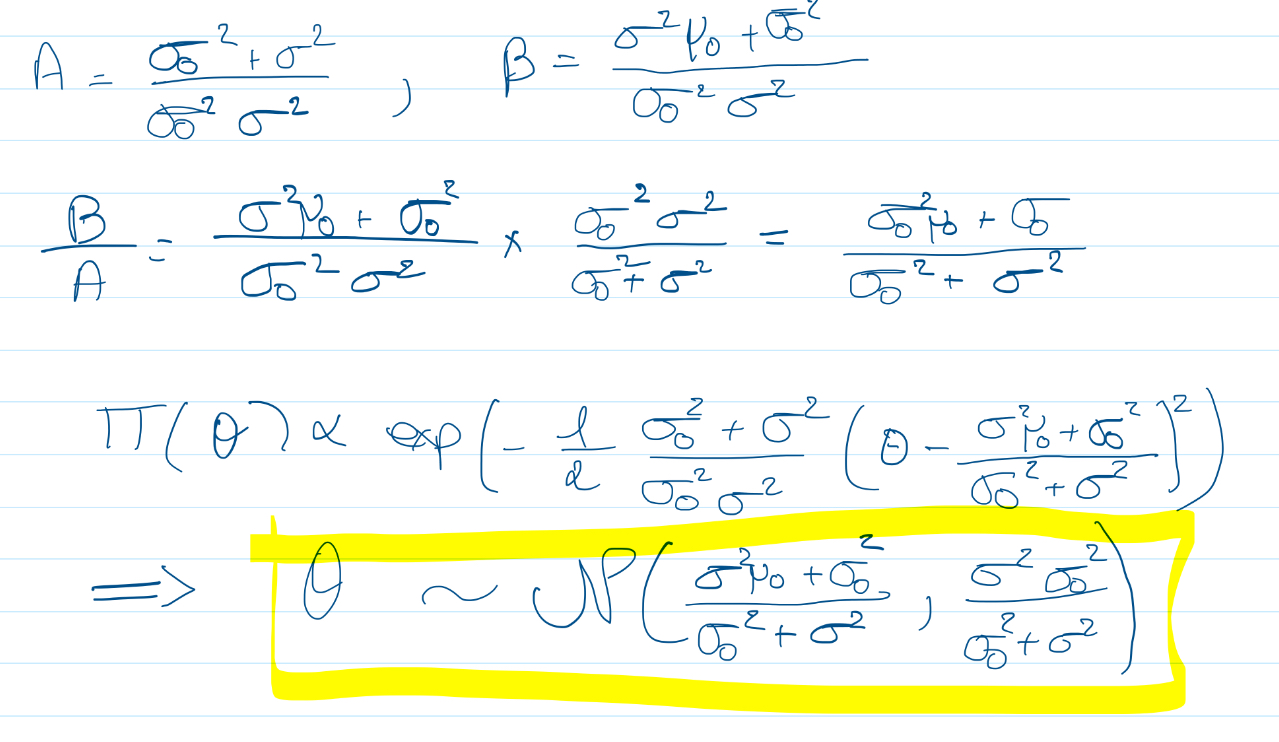


2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [153]:
# Paramètres a priori
mu0 = 3500  # Moyenne a priori
sigma0 = 500  # Écart-type a priori
sigma = 400  # Écart-type connu

# Liste pour stocker les DataFrames de chaque année
posterior_dfs = []

# Boucle sur chaque année de 2013 à 2023
for year in range(2013, 2024):
    # Sélection les données pour l'année en cours
    df_year = df[df['date'].dt.year == year]
    
    # Calcul de la moyenne des données de l'année en cours
    x_bar = df_year['consumption'].mean()
    
    # Calcul des paramètres de la loi a posteriori pour mu
    mu_post = (mu0 * sigma**2 + sigma0**2 * len(df_year)* x_bar)/(len(df_year)*sigma0**2 + sigma**2)
    sigma_post = (sigma**2 * sigma0**2) / (len(df_year) * sigma0**2 + sigma**2)
    
    # Création un DataFrame pour les paramètres de la loi a posteriori de l'année en cours
    posterior_df = pd.DataFrame({'Year': year, 'Mu_posterior': mu_post, 'Sigma_posterior': sigma_post}, index=[0])
    
    # Ajout le DataFrame de l'année en cours à la liste
    posterior_dfs.append(posterior_df)

# les DataFrames en un seul DataFrame final
posterior_df_final = pd.concat(posterior_dfs, ignore_index=True)

# Affichez le DataFrame final
print(posterior_df_final)

    Year  Mu_posterior  Sigma_posterior
0   2013   4680.591877        36.524343
1   2014   4397.672714        36.524343
2   2015   4500.441260        36.524343
3   2016   4556.086317        36.424565
4   2017   4556.483299        36.524343
5   2018   4522.961485        36.524343
6   2019   4474.984021        36.524343
7   2020   4226.956910        36.424565
8   2021   4443.779219        36.524343
9   2022   4276.362586        36.524343
10  2023   4500.182055        88.269044


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

4500.1820549033455
88.26904404625297


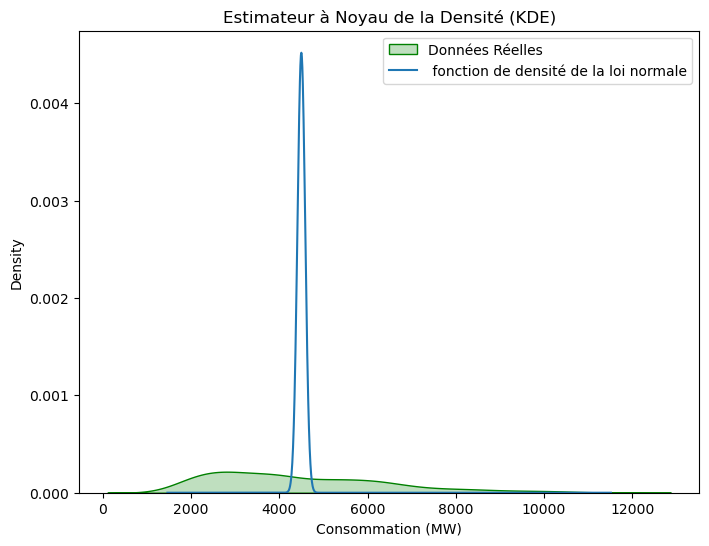

In [266]:
df_2023 = df[df['date'].dt.year == 2023]
x_bar = np.mean(df_2023['consumption'])
mu0 = 3500  # Moyenne a priori
sigma0 = 500  # Écart-type a priori
sigma = 400  # Écart-type connu

# Calcul des paramètres de la loi a posteriori pour mu
mu_post_2023 = (mu0 * sigma**2 + sigma0**2 * len(df_2023)* x_bar)/(len(df_2023)*sigma0**2 + sigma**2)
sigma_post_2023 = (sigma**2 * sigma0**2) / (len(df_2023) * sigma0**2 + sigma**2)

print(mu_post_2023)
print(sigma_post_2023)

# Tracé de l'estimateur à noyau de la densité (KDE)

plt.figure(figsize=(8, 6))

sns.kdeplot(data=df_2023, x="consumption", label="Données Réelles", color='green', fill=True)

#tracé de la loi à posteriori
def DensiteNormale(x,mu,sigma):
    return 1/(sigma * np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)/sigma)**2)

lx=np.linspace(np.min(df_2023["consumption"]),np.max(df_2023["consumption"]),len(df_2023))
ly=[DensiteNormale(x,mu_post_2023,sigma_post_2023) for x in lx]
plt.plot(lx,ly, label = ' fonction de densité de la loi normale')

#plt.hist(loi_a_posteriori)
plt.title("Estimateur à Noyau de la Densité (KDE)")
plt.xlabel("Consommation (MW)")
plt.legend()
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Votre réponse :

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous shouaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

Votre réponse :

On sait que cela suit une loi normal $N ( \mu , \sigma^2) $ avec $\mu$ on s'interrese au parametre $\sigma^2$

H0 : $\sigma^2 = 500 $

H1 : $\sigma^2 \ne 500 $

Sous l'hypothèse H0 la statistique :

$V =  \frac {nS_n} {\sigma_{H0}^2} = \sum_{k=1}^{n} ( \frac {X_{k} - \mu } {\sigma_{H0}})$ qui suit une loi de $ \chi^2 $ à n dégres de liberté

Pour u risque d'erreur $\alpha$ , on a donc

$ P( \chi_{\alpha / 2}^2  <=  \frac {nS_n} {\sigma_{H0}^2} <= \chi_{1 -\alpha / 2}^2 ) = 1 - \alpha $ 

donc la zone de rejet est
$ [0, \chi_{\alpha / 2}^2 ]  U  [\chi_{1 -\alpha / 2}^2, +\inf]$

2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [271]:
# Données de l'échantillon
n = len(df_2023)
mu = 3200
sigma_2023 = 400

# Niveau de signification alpha
alpha = 0.01

# Valeur hypothétique sous H0
sigma_h0 = 500

# Calcul de la statistique de test
test_statistic = (n - 1) * sigma_2023 / sigma_h0

# Degrés de liberté
degrees_of_freedom = n - 1

# Calcul des valeurs critiques
chi2_alpha_over_2 = chi2.ppf(1 - alpha / 2, degrees_of_freedom)
chi2_1_minus_alpha_over_2 = chi2.ppf(alpha / 2, degrees_of_freedom)

# Réponse au test
if test_statistic < chi2_alpha_over_2 or test_statistic > chi2_1_minus_alpha_over_2:
    print("Rejeter l'hypothèse nulle H0")
else:
    print("Ne pas rejeter l'hypothèse nulle H0")


Rejeter l'hypothèse nulle H0


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

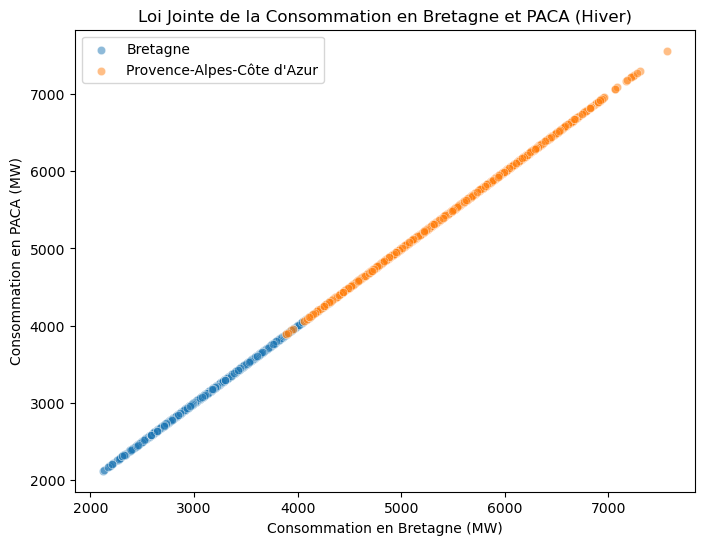

In [383]:
# les données pour les régions Bretagne et Provence-Alpes-Côte d'Azur en hiver
df_bretagne = df_winter[df_winter['region'] == 'Bretagne']
df_paca = df_winter[df_winter['region'] == "Provence-Alpes-Côte d'Azur"]

# graphique de nuages de points (scatter plot) avec Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_bretagne, x='consumption', y='consumption', label='Bretagne', alpha=0.5)
sns.scatterplot(data=df_paca, x='consumption', y='consumption', label="Provence-Alpes-Côte d'Azur", alpha=0.5)
plt.title('Loi Jointe de la Consommation en Bretagne et PACA (Hiver)')
plt.xlabel('Consommation en Bretagne (MW)')
plt.ylabel('Consommation en PACA (MW)')
plt.legend()
plt.show()

2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Votre réponse :

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

Votre réponse :

D'après le cours, test sur la coorélaiton dans un couple Gaussien, pour tester l indépendance de la consommation dans ces deux régions pour un niveau $ \alpha$

Soit le couple Aleatoire X (pour la region provence Alpes Cote d'azur) et Y (la region brretagne) de loi Gaussienne bivariée

$$ \mu = \begin{bmatrix}{\sigma_{paca}}^2 & {\sigma_{paca}*\sigma_{bretagne}} \\\ {\sigma_{paca}*\sigma_{bretagne}} & {\sigma_{bretagne}}^2 \end{bmatrix} $$

$ H0 : \rho = 0 $

$H1 : \rho \ne 0$

$$ R = \frac {\sum_{k=1}^{n}(X_{i} - \bar{X}))(Y_{i} - \bar{Y})} {\sqrt{\sum_{k=1}^{n}(X_{i} - \bar{X})^2}\sqrt{\sum_{k=1}^{n}(X_{i} - \bar{Y})^2}} $$

$$ T = \frac {\sqrt{n-2}R} {\sqrt{1- R²}} $\sim T(n-2) $$  où  T-student

donc la zone de rejet :
$$ A = [ - t_{1 - \alpha/2}^{n-2} , t_{1 - \alpha/2}^{n-2} ] $$

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [373]:
from scipy import stats

# Données des deux régions
df_paca = df[df.region == "Provence-Alpes-Côte d'Azur"]
df_bretagne = df[df.region == "Bretagne"]

consumption_paca = df_paca["consumption"]
consumption_bretagne = df_bretagne["consumption"]

# le test de corrélation de Pearson pour tester l'indépendance des deux variables aléatoires
t_statistic, p_value = stats.pearsonr(consumption_paca, consumption_bretagne)

# Sdefinition des parametres

deg_of_freedom = len(consumption_paca) + len(consumption_bretagne)  - 2
alpha = 0.01  

# Calcul des quantiles de la loi de Student
t_lower = stats.t.ppf(alpha / 2, df=deg_of_freedom)
t_upper = stats.t.ppf(1 - alpha / 2, df=deg_of_freedom)

# Zone de rejet
rejection_area = [t_lower, t_upper]
print(rejection_area)

# Aon affiche lla t-statistique
print(f"Statistique du test t : {t_statistic}")

# On compare le t-critique et la zone de rejet pour prendrer une décision 
if t_statistic >= t_lower or t_statistic <= t_lower :
    print("Les variables aléatoires sont dépendantes.")
else:
    print("Les variables aléatoires sont indépendantes.")


[-2.5764760302277367, 2.5764760302277363]
Statistique du test t : 0.8751140419568694
Valeur-p : 0.0
Les variables aléatoires sont dépendantes.


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [309]:
# Taille de l'échantillon
n_bretagne_winter = len(df_bretagne_winter)

moyen_bretagne = np.mean(consumption_bretagne_winter)
sigma_bretagne = np.std(consumption_bretagne_winter, ddof =1)

# Niveau de confiance (1 - alpha)
alpha = 0.05

# Score critique Z pour un niveau de confiance de 95%
Z = norm.ppf(1 - alpha/2)

# Calcul de l'intervalle de confiance
intervalle_confiance = (moyen_bretagne - Z * sigma_bretagne / np.sqrt(n_bretagne_winter), moyen_bretagne + Z * sigma_bretagne / np.sqrt(n_bretagne_winter))

print("Intervalle de Confiance (95%):", intervalle_confiance)

Intervalle de Confiance (95%): (3159.1734945596468, 3203.986259664624)


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [382]:
from scipy import stats

# Moyenne sous l'hypothèse nulle (H0)
moyenne_h0 = 3100  # Hypothèse nulle

# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(consumption_bretagne_winter, moyenne_h0)
print("T statistic:", t_stat)

alpha = 0.05

deg_of_freedom = len(consumption_bretagne_winter)   - 2 

# Calcul des quantiles de la loi de Student
t_lower_bretagne_winter = stats.t.ppf(alpha / 2, df=deg_of_freedom)
t_upper_bretagne_winter = stats.t.ppf(1 - alpha / 2, df=deg_of_freedom)

# Zone de rejet
rejection_area = [t_lower_bretagne_winter, t_upper_bretagne_winter]
print(rejection_area)

# On affiche la statistique du test t et la valeur-p
print(f"Statistique du test t : {t_stat}")

# On compare le t-critique et la zone de rejet pour prendrer une décision 
if t_stat >= t_lower_bretagne_winter and t_stat <= t_upper_bretagne_winter :
    print("On rejette l'hypothèse nulle")
else:
    print("On accepte l'hypothèse nulle")


T statistic: 7.136074760324437
[-1.9617904798447776, 1.9617904798447772]
Statistique du test t : 7.136074760324437
On accepte l'hypothèse nulle
